In [2]:
# import Libraries
import numpy as np
import pandas as pd

#from sklearn.model_selection import train_test_split
#from sklearn.neighbors import KNeighborsClassifier

In [37]:
# import visual libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [66]:
# import Linear Regression libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# import Decision Tree // Random Forest


In [3]:
adrar_df = pd.read_csv("/Users/sashacrowe/codebase-ih/gpw7/data/raw/data adrar.csv")

## Data Info (Changes Apply)

In [44]:
adrar_df.head()

,date,WS50M,T2M,PS,WS10M,just_date,day_time,season,hour,doy
0,2015-01-01 00:00:00,7.42,2.80,99.29,3.79,2015-01-01,00:00,4,0,1
1,2015-01-01 01:00:00,7.06,2.24,99.29,3.63,2015-01-01,01:00,4,1,1
2,2015-01-01 02:00:00,6.91,1.71,99.26,3.56,2015-01-01,02:00,4,2,1
3,2015-01-01 03:00:00,7.03,1.24,99.23,3.57,2015-01-01,03:00,4,3,1
4,2015-01-01 04:00:00,6.83,0.70,99.26,3.47,2015-01-01,04:00,4,4,1


In [46]:
adrar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       70128 non-null  datetime64[ns]
 1   WS50M      70128 non-null  float64       
 2   T2M        70128 non-null  float64       
 3   PS         70128 non-null  float64       
 4   WS10M      70128 non-null  float64       
 5   just_date  70128 non-null  datetime64[ns]
 6   day_time   70128 non-null  object        
 7   season     70128 non-null  int64         
 8   hour       70128 non-null  int32         
 9   doy        70128 non-null  int32         
dtypes: datetime64[ns](2), float64(4), int32(2), int64(1), object(1)
memory usage: 4.8+ MB


In [5]:
adrar_df.shape

(70128, 5)

In [47]:
# checking for nulls

In [8]:
adrar_df.isnull().sum()

date     0
WS50M    0
T2M      0
PS       0
WS10M    0
dtype: int64

## Feature Engineering & Transformations

**Getting the 'Season' column**
- Spring = 1
- Summer = 2
- Autumn = 3
- Winter = 4

In [9]:
adrar_df[['just_date', 'day_time']] = adrar_df['date'].str.split(' ', expand=True)

In [17]:
# Convert the 'date' column to datetime format
adrar_df['just_date'] = pd.to_datetime(adrar_df['just_date'], format='%d/%m/%Y')

In [43]:
# Define a function to assign seasons based on the month
def get_season(date):
    month = date.month
    day = date.day

    if (month == 3 and day >= 1) or (month >= 4 and month <= 5):
        return 1
    elif (month == 6 and day >= 1) or (month >= 7 and month <= 8):
        return 2
    elif (month == 9 and day >= 1) or (month >= 10 and month <= 11):
        return 3
    else:
        return 4

# Create a new 'season' column
adrar_df['season'] = adrar_df['just_date'].apply(get_season)

**Getting numeric date & hour columns**

In [30]:
adrar_df['date'] = pd.to_datetime(adrar_df['date'],format="%d/%m/%Y %H:%M")

In [34]:
# getting a numeric hour

adrar_df['hour'] = adrar_df['date'].dt.hour

In [41]:
# getting a numeric day of year (doy)

adrar_df['doy'] = adrar_df['date'].dt.dayofyear

In [ ]:
# Mau to checkout how to get unique day numbers

## Target & Features

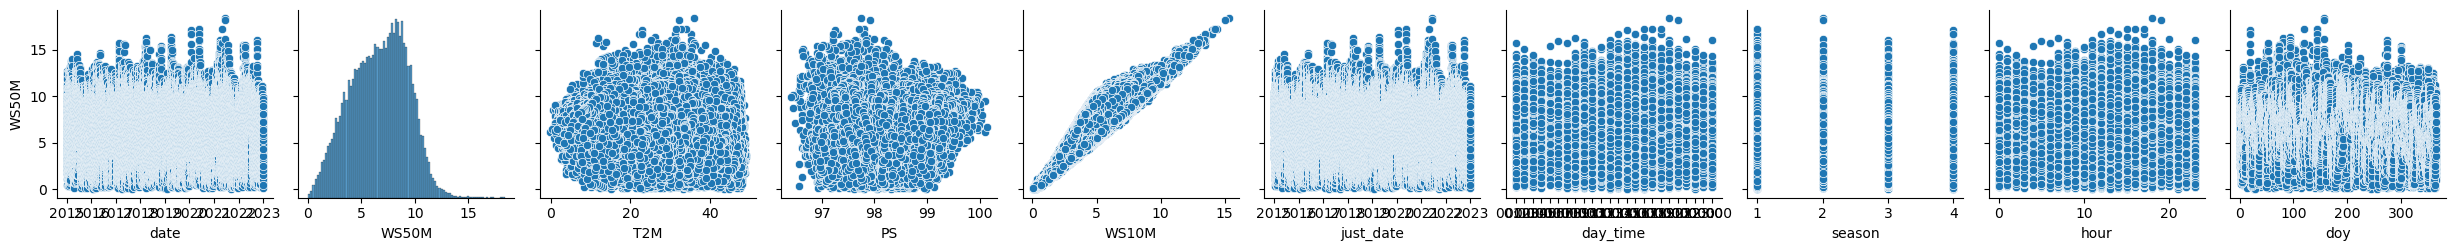

In [45]:
# checking to see the relationships b/w the target & features
sns.pairplot(adrar_df, y_vars=['WS50M'], x_vars=adrar_df.columns[:], kind='scatter');

Checking the distributions

<Axes: >

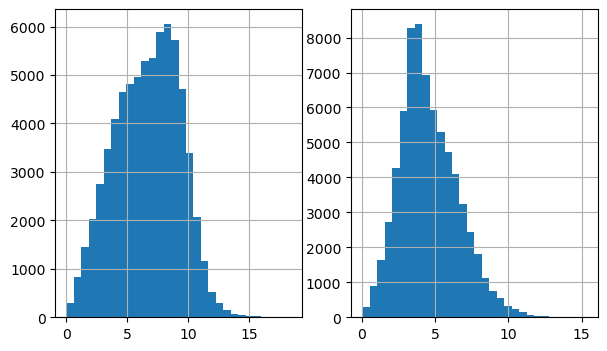

In [51]:
fig, axes = plt.subplots(1,2, figsize=(7,4))
adrar_df['WS50M'].hist(bins=30,ax = axes[0])
adrar_df['WS10M'].hist(bins=30,ax = axes[1])

<Axes: >

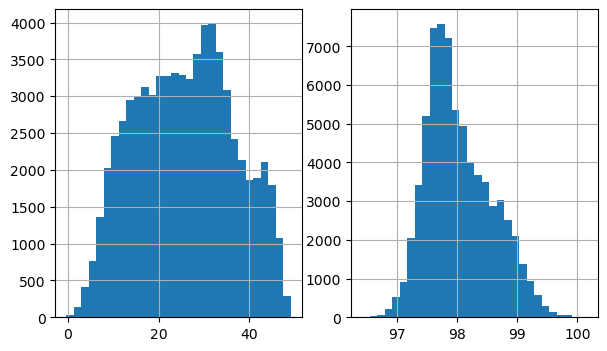

In [52]:
fig, axes = plt.subplots(1,2, figsize=(7,4))
adrar_df['T2M'].hist(bins=30,ax = axes[0])
adrar_df['PS'].hist(bins=30,ax = axes[1])

<Axes: >

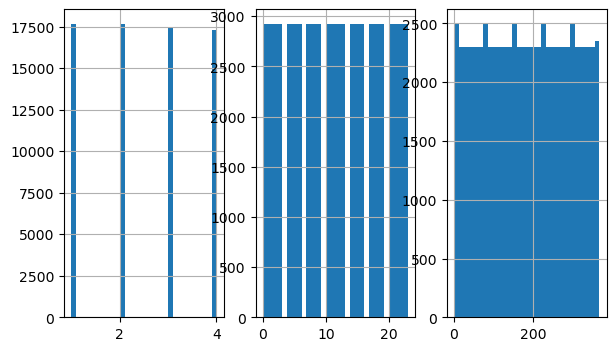

In [56]:
fig, axes = plt.subplots(1,3, figsize=(7,4))
adrar_df['season'].hist(bins=30,ax = axes[0])
adrar_df['hour'].hist(bins=30,ax = axes[1])
adrar_df['doy'].hist(bins=30,ax = axes[2])

**Dropping non-numeric columns**

In [58]:
adrar_num_df = adrar_df.drop(columns=['date', 'just_date', 'day_time'])

In [59]:
adrar_num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WS50M   70128 non-null  float64
 1   T2M     70128 non-null  float64
 2   PS      70128 non-null  float64
 3   WS10M   70128 non-null  float64
 4   season  70128 non-null  int64  
 5   hour    70128 non-null  int32  
 6   doy     70128 non-null  int32  
dtypes: float64(4), int32(2), int64(1)
memory usage: 3.2 MB


**Feature Selection**

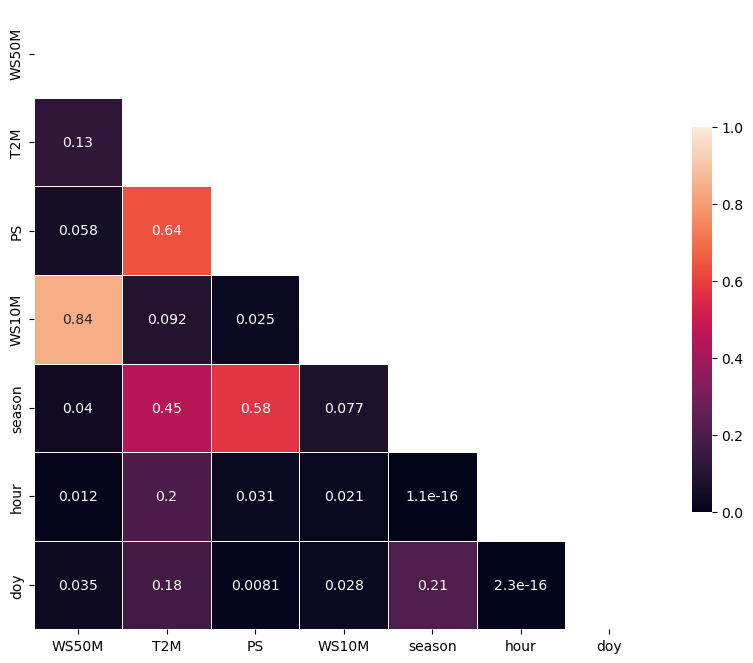

In [61]:
corr=np.abs(adrar_num_df.corr()) # corr(x,y) = corr(y, x), corr(x,x) = 1

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

**Creating the training & test sets**

In [63]:
# remember to re-run this cell if new features are added [!!!]

features = adrar_num_df.drop(columns = ["WS50M"])
target = adrar_num_df["WS50M"]

In [67]:
# getting the training & test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

**Standardizing with StandarScaler**

In [68]:
# initialize scaler
scaler = StandardScaler()

In [69]:
# fit the model to the training data exclusively // transform X_train
X_train_norm = scaler.fit_transform(X_train)

In [70]:
# transform X_test
X_test_norm = scaler.transform(X_test)

turning transformations arrays back into a dataframe object

In [ ]:
#X_train_norm = pd.DataFrame(X_train_norm, columns=X_train.columns, index=X_train.index )
#X_train_norm.head()

In [ ]:
#X_test_norm = pd.DataFrame(X_test_norm, columns=X_test.columns, index=X_test.index)
#X_test_norm.head()

In [ ]:
sns.pairplot(adrar_df, y_vars=['WS50M'], x_vars=adrar_df.columns[:], kind='scatter');

## Linear Regression

In [71]:
# creating & training the linear regression model
model = LinearRegression()
model.fit(X_train_norm, y_train)

LinearRegression()

In [72]:
# making predictions
y_pred = model.predict(X_test_norm)

In [73]:
# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 1.5701846594658033
R² Score: 0.7744105580405676


In [74]:
# printing the model's coefficients
print('Coefficient:', model.coef_)
print('Intercept:', model.intercept_)

Coefficient: [-0.94506157 -0.41182491  2.31132634 -0.15771754  0.19995955  0.17037835]
Intercept: 6.641424191650938


In [78]:
adrar_num_df['WS50M'].describe()

count    70128.000000
mean         6.641956
std          2.637746
min          0.030000
25%          4.660000
50%          6.800000
75%          8.660000
max         18.370000
Name: WS50M, dtype: float64

## Decision Trees -> Random Forest